In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import torch
from data_parser import data_loader_full
import io
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

file_path = 'Predicted/results.pkl'
with open(file_path, 'rb') as pickle_file:
    pred = CPU_Unpickler(pickle_file).load()

In [3]:
data_occupancy_all, data_flow_all, data_speed_all = data_loader_full()
X_occu_all, y_occu_all = data_occupancy_all[:, :2], data_occupancy_all[:, 2]
X_occu_all, y_occu_all = torch.tensor(X_occu_all, dtype=torch.float32, requires_grad=True), torch.tensor(y_occu_all, dtype=torch.float32).unsqueeze(1)

In [4]:
pred_occu = pred['occupancy_recon'].to(torch.device('cpu'))
pred_flow = pred['flow_recon'].to(torch.device('cpu'))
pred_speed = pred['speed_recon'].to(torch.device('cpu'))

pred_k_t = pred['k_t'].to(torch.device('cpu'))

pred_k_x = pred['k_x'].to(torch.device('cpu'))
pred_q_x = pred['q_x'].to(torch.device('cpu'))
pred_v_x = pred['v_x'].to(torch.device('cpu'))
pred_k_t_predict = pred['k_t_predict'].to(torch.device('cpu'))

pred_k_xx = pred['k_xx'].to(torch.device('cpu'))
pred_q_xx = pred['q_xx'].to(torch.device('cpu'))
pred_v_xx = pred['v_xx'].to(torch.device('cpu'))

In [5]:
occupancy_recon = torch.cat((X_occu_all, pred_occu), dim=1).detach().numpy()
flow_recon = torch.cat((X_occu_all, pred_flow), dim=1).detach().numpy()
speed_recon = torch.cat((X_occu_all, pred_speed), dim=1).detach().numpy()

k_t = torch.cat((X_occu_all, pred_k_t), dim=1).detach().numpy()
k_x = torch.cat((X_occu_all,pred_k_x), dim=1).detach().numpy()
q_x = torch.cat((X_occu_all, pred_q_x), dim=1).detach().numpy()
v_x = torch.cat((X_occu_all, pred_v_x), dim=1).detach().numpy()

k_xx = torch.cat((X_occu_all,pred_k_xx), dim=1).detach().numpy()
q_xx = torch.cat((X_occu_all, pred_q_xx), dim=1).detach().numpy()
v_xx = torch.cat((X_occu_all, pred_v_xx), dim=1).detach().numpy()

k_t_predict = torch.cat((X_occu_all, pred_k_t_predict), dim=1).detach().numpy()

occupancy_recon = pd.DataFrame(occupancy_recon, columns = ['TimeStep','Station_Number','Occupancy'])
flow_recon = pd.DataFrame(flow_recon, columns = ['TimeStep','Station_Number','Flow'])
speed_recon = pd.DataFrame(speed_recon, columns = ['TimeStep','Station_Number','Speed'])

k_t = pd.DataFrame(k_t, columns = ['TimeStep','Station_Number','k_t'])

k_x = pd.DataFrame(k_x, columns = ['TimeStep', 'Station_Number', 'k_x'])
q_x = pd.DataFrame(q_x, columns = ['TimeStep', 'Station_Number', 'q_x'])
v_x = pd.DataFrame(v_x, columns = ['TimeStep', 'Station_Number', 'v_x'])

k_xx = pd.DataFrame(k_xx, columns = ['TimeStep', 'Station_Number', 'k_xx'])
q_xx = pd.DataFrame(q_xx, columns = ['TimeStep', 'Station_Number', 'q_xx'])
v_xx = pd.DataFrame(v_xx, columns = ['TimeStep', 'Station_Number', 'v_xx'])

k_t_predict = pd.DataFrame(k_t_predict, columns=['TimeStep', 'Station_Number', 'k_t'])

In [6]:
Flow = pd.read_csv('Data_Clean/Flow_all.csv',index_col='Station_PM')
Occupancy = pd.read_csv('Data_Clean/Occupancy_all.csv',index_col='Station_PM')
Speed = pd.read_csv('Data_Clean/Speed_all.csv',index_col='Station_PM')

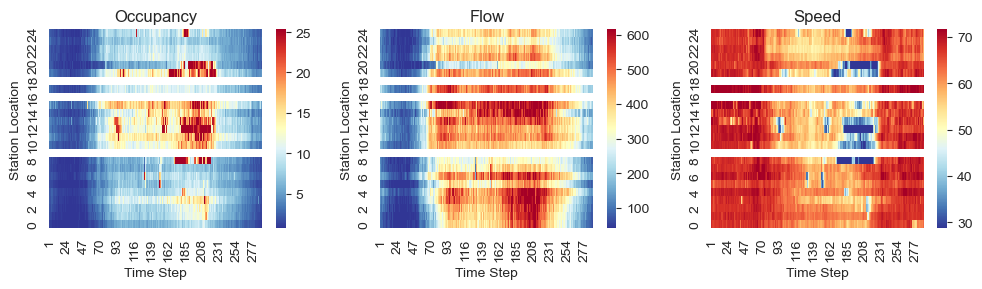

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# y_tick_positions = range(10, 288, 10)  # Adjust as needed
# y_tick_labels = [str(val) for val in y_tick_positions]

sns.heatmap(100*Occupancy.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location')
axs[0].set_xlabel('Time Step')
axs[0].set_title("Occupancy")

sns.heatmap(Flow.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location')
axs[1].set_xlabel('Time Step')
axs[1].set_title("Flow")

sns.heatmap(Speed.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location')
axs[2].set_xlabel('Time Step')
axs[2].set_title("Speed")


plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap.png", dpi = 300)

In [8]:
Flow_ori = pd.read_csv('Data_Clean/Flow.csv',index_col='Station_PM')
Occupancy_ori = pd.read_csv('Data_Clean/Occupancy.csv',index_col='Station_PM')
Speed_ori = pd.read_csv('Data_Clean/Speed.csv',index_col='Station_PM')

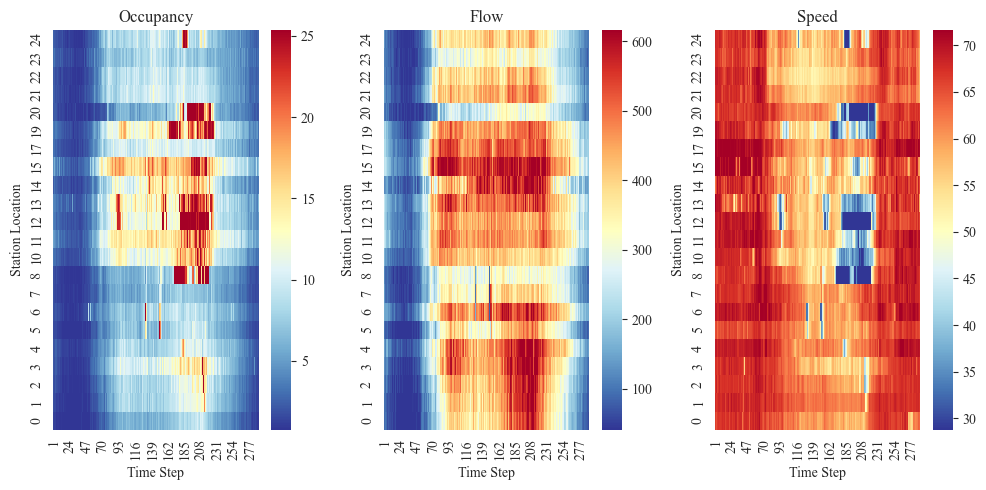

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# y_tick_positions = range(10, 288, 10)  # Adjust as needed
# y_tick_labels = [str(val) for val in y_tick_positions]

sns.heatmap(100*Occupancy_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location')
axs[0].set_xlabel('Time Step')
axs[0].set_title("Occupancy")

sns.heatmap(Flow_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location')
axs[1].set_xlabel('Time Step')
axs[1].set_title("Flow")

sns.heatmap(Speed_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location')
axs[2].set_xlabel('Time Step')
axs[2].set_title("Speed")

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap_without.png", dpi = 300)

## Plot Reconstructed Data

In [10]:
occupancy_recon['TimeStep'] = occupancy_recon['TimeStep'].astype(int)
occupancy_recon['Station_Number'] = occupancy_recon['Station_Number'].astype(int)
flow_recon['TimeStep'] = flow_recon['TimeStep'].astype(int)
flow_recon['Station_Number'] = flow_recon['Station_Number'].astype(int)
speed_recon['TimeStep'] = speed_recon['TimeStep'].astype(int)
speed_recon['Station_Number'] = speed_recon['Station_Number'].astype(int)

In [11]:
occupancy_recon_wide = occupancy_recon.pivot(index='Station_Number', columns='TimeStep', values='Occupancy')
flow_recon_wide = flow_recon.pivot(index='Station_Number', columns='TimeStep', values='Flow')
speed_recon_wide = speed_recon.pivot(index='Station_Number', columns='TimeStep', values='Speed')

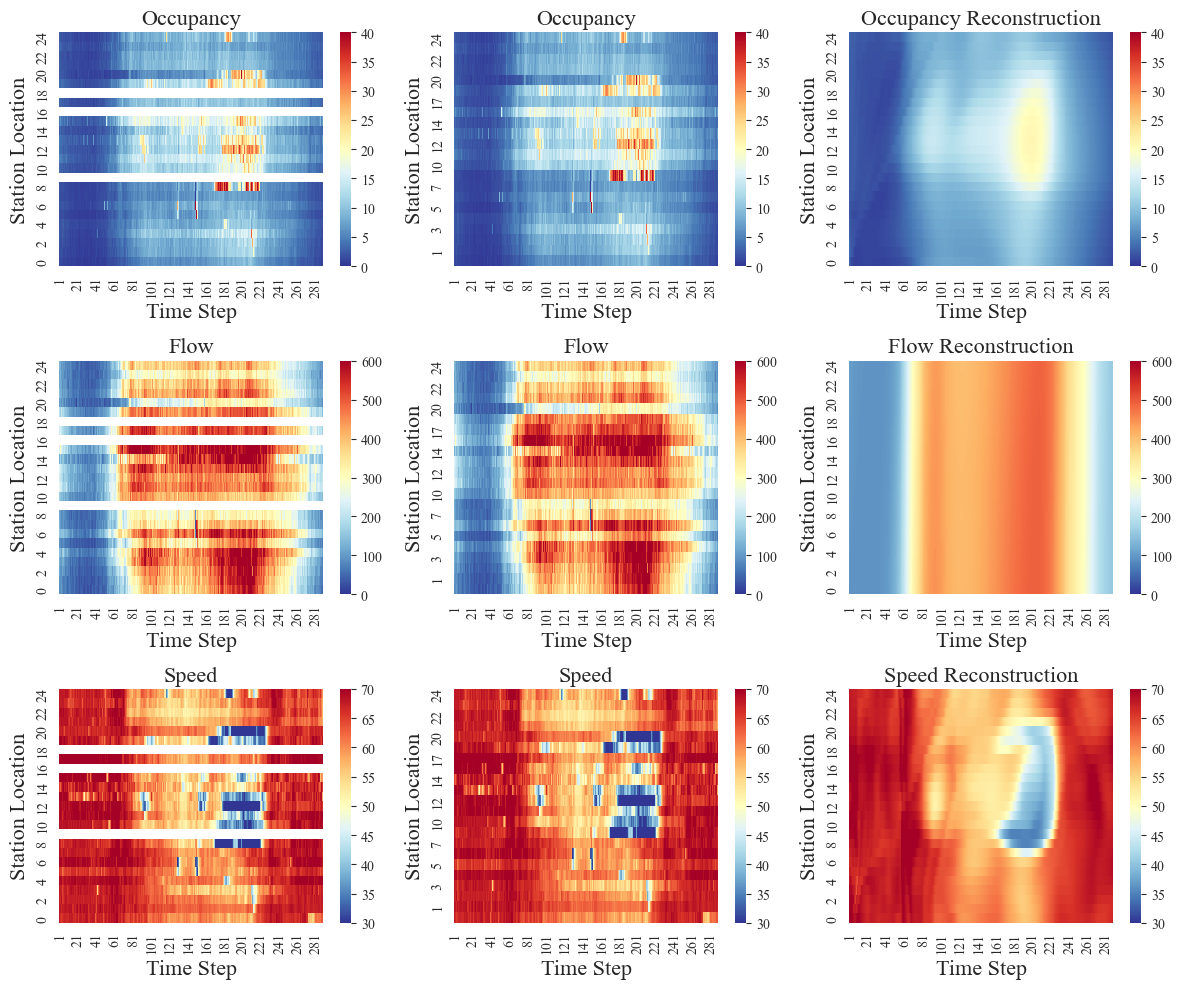

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

vmin1_occu, vmax1_occu = 0, 40

sns.heatmap(100*Occupancy.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,0])
axs[0,0].set_ylabel('Station Location', fontsize = 16)
axs[0,0].set_xlabel('Time Step',  fontsize = 16)
axs[0,0].set_title("Occupancy",  fontsize = 16)

sns.heatmap(100*Occupancy_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,1])
axs[0,1].set_ylabel('Station Location', fontsize = 16)
axs[0,1].set_xlabel('Time Step',  fontsize = 16)
axs[0,1].set_title("Occupancy",  fontsize = 16)


sns.heatmap(occupancy_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,2])
axs[0,2].set_ylabel('Station Location',  fontsize = 16)
axs[0,2].set_xlabel('Time Step',  fontsize = 16)
axs[0,2].set_title("Occupancy Reconstruction",  fontsize = 16)

vmin1_flow, vmax1_flow = 0, 600

sns.heatmap(Flow.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,0])
axs[1,0].set_ylabel('Station Location',  fontsize = 16)
axs[1,0].set_xlabel('Time Step',  fontsize = 16)
axs[1,0].set_title("Flow",  fontsize = 16)

sns.heatmap(Flow_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,1])
axs[1,1].set_ylabel('Station Location',  fontsize = 16)
axs[1,1].set_xlabel('Time Step',  fontsize = 16)
axs[1,1].set_title("Flow",  fontsize = 16)

sns.heatmap(flow_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,2])
axs[1,2].set_ylabel('Station Location',  fontsize = 16)
axs[1,2].set_xlabel('Time Step',  fontsize = 16)
axs[1,2].set_title("Flow Reconstruction",  fontsize = 16)

vmin1_speed, vmax1_speed = 30, 70

sns.heatmap(Speed.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,0])
axs[2,0].set_ylabel('Station Location',  fontsize = 16)
axs[2,0].set_xlabel('Time Step',  fontsize = 16)
axs[2,0].set_title("Speed",  fontsize = 16)

sns.heatmap(Speed_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,1])
axs[2,1].set_ylabel('Station Location',  fontsize = 16)
axs[2,1].set_xlabel('Time Step',  fontsize = 16)
axs[2,1].set_title("Speed",  fontsize = 16)

sns.heatmap(speed_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,2])
axs[2,2].set_ylabel('Station Location',  fontsize = 16)
axs[2,2].set_xlabel('Time Step',  fontsize = 16)
axs[2,2].set_title("Speed Reconstruction",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap_all.png", dpi = 300)

In [30]:
flow_recon_wide

TimeStep,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
Station_Number,,,,,,,,,,,,,,,,,,,,,
0,93.642784,92.220627,92.330742,92.479279,92.563377,92.594490,92.586380,92.550636,92.496574,92.431763,...,175.416809,172.791687,170.391083,168.196060,166.188660,164.352066,162.670883,161.130798,159.718750,158.422806
1,94.299171,92.451225,92.344154,92.451233,92.551109,92.607552,92.606979,92.575134,92.523979,92.460983,...,175.465775,172.839981,170.438751,168.242889,166.234589,164.397064,162.714859,161.173737,159.760757,158.463959
2,94.940002,92.644356,92.391159,92.470459,92.538277,92.574478,92.595573,92.573418,92.533180,92.478928,...,175.526810,172.899551,170.496719,168.299332,166.289520,164.450485,162.766861,161.224335,159.809906,158.511795
3,95.717537,93.040932,92.440819,92.457390,92.534492,92.574547,92.578880,92.573387,92.543823,92.495010,...,175.599670,172.969391,170.563782,168.363846,166.351562,164.510315,162.824509,161.279984,159.863663,158.563843
4,96.587906,93.766441,92.616722,92.438446,92.498451,92.559090,92.582031,92.574394,92.550049,92.514786,...,175.682480,173.047470,170.637512,168.433670,166.417953,164.573502,162.884903,161.337799,159.919189,158.617249
5,97.404198,94.590477,93.044052,92.485619,92.448723,92.520149,92.567276,92.578049,92.564079,92.534019,...,175.768845,173.127045,170.711304,168.502441,166.482361,164.634125,162.942230,161.392288,159.971176,158.667023
6,98.049004,95.512604,93.795135,92.831207,92.487213,92.477791,92.529816,92.557983,92.558334,92.541130,...,175.844025,173.193268,170.770264,168.555481,166.530685,164.678635,162.983643,161.431274,160.008224,158.702576
7,98.477219,96.299278,94.594337,93.422318,92.739464,92.497917,92.492844,92.526421,92.540573,92.534492,...,175.906204,173.240921,170.806488,168.583023,166.551727,164.695084,162.996933,161.442505,160.018295,158.712158
8,98.859039,96.957794,95.318413,94.080246,93.207474,92.683449,92.503265,92.496384,92.514412,92.517723,...,176.011169,173.318573,170.861664,168.620102,166.574707,164.707306,163.001328,161.441391,160.013641,158.705368


In [21]:
k_t['TimeStep'] = k_t['TimeStep'].astype(int)
k_t['Station_Number'] = k_t['Station_Number'].astype(int)

k_t_predict['TimeStep'] = k_t_predict['TimeStep'].astype(int)
k_t_predict['Station_Number'] = k_t_predict['Station_Number'].astype(int)

k_x['TimeStep'] = k_x['TimeStep'].astype(int)
k_x['Station_Number'] = k_x['Station_Number'].astype(int)

q_x['TimeStep'] = q_x['TimeStep'].astype(int)
q_x['Station_Number'] = q_x['Station_Number'].astype(int)

v_x['TimeStep'] = v_x['TimeStep'].astype(int)
v_x['Station_Number'] = v_x['Station_Number'].astype(int)

In [22]:
k_t_wide = k_t.pivot(index='Station_Number', columns='TimeStep', values='k_t')
k_t_predict_wide = k_t_predict.pivot(index='Station_Number', columns='TimeStep', values='k_t')

k_x_wide = k_x.pivot(index='Station_Number', columns='TimeStep', values='k_x')

q_x_wide = q_x.pivot(index='Station_Number', columns='TimeStep', values='q_x')

v_x_wide = v_x.pivot(index='Station_Number', columns='TimeStep', values='v_x')

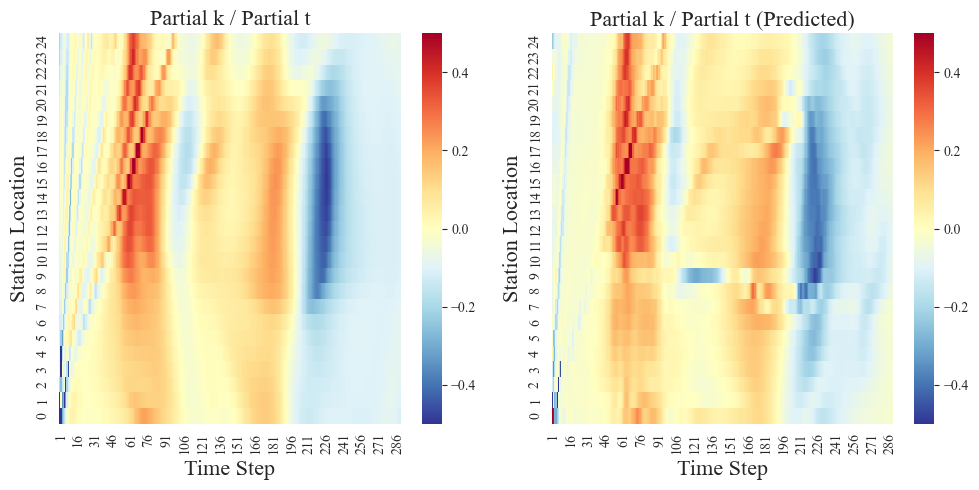

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

vmin, vmax = -0.5, 0.5
sns.heatmap(k_t_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin, vmax=vmax, annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial t",  fontsize = 16)

sns.heatmap(k_t_predict_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin, vmax=vmax, annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial k / Partial t (Predicted)",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/k_dev.png", dpi = 300)

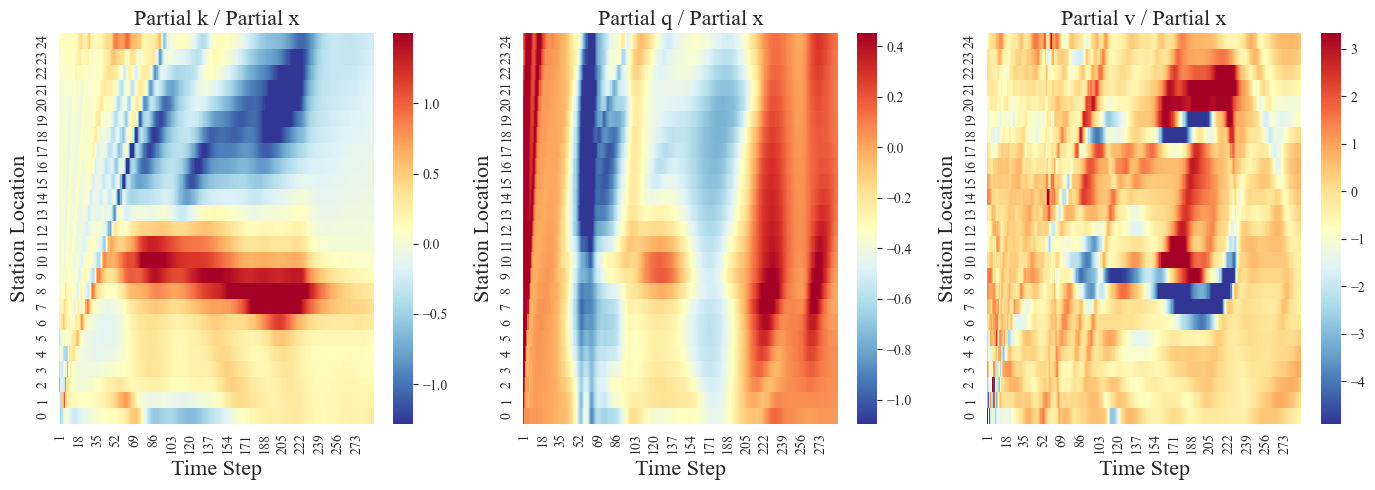

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(k_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial x",  fontsize = 16)

sns.heatmap(q_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial q / Partial x",  fontsize = 16)

sns.heatmap(v_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location',  fontsize = 16)
axs[2].set_xlabel('Time Step',  fontsize = 16)
axs[2].set_title("Partial v / Partial x",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/qv_dev.png", dpi = 300)

In [25]:
k_xx['TimeStep'] = k_xx['TimeStep'].astype(int)
k_xx['Station_Number'] = k_xx['Station_Number'].astype(int)

q_xx['TimeStep'] = q_xx['TimeStep'].astype(int)
q_xx['Station_Number'] = q_xx['Station_Number'].astype(int)

v_xx['TimeStep'] = v_xx['TimeStep'].astype(int)
v_xx['Station_Number'] = v_xx['Station_Number'].astype(int)

In [26]:
k_xx_wide = k_xx.pivot(index='Station_Number', columns='TimeStep', values='k_xx')

q_xx_wide = q_xx.pivot(index='Station_Number', columns='TimeStep', values='q_xx')

v_xx_wide = v_xx.pivot(index='Station_Number', columns='TimeStep', values='v_xx')

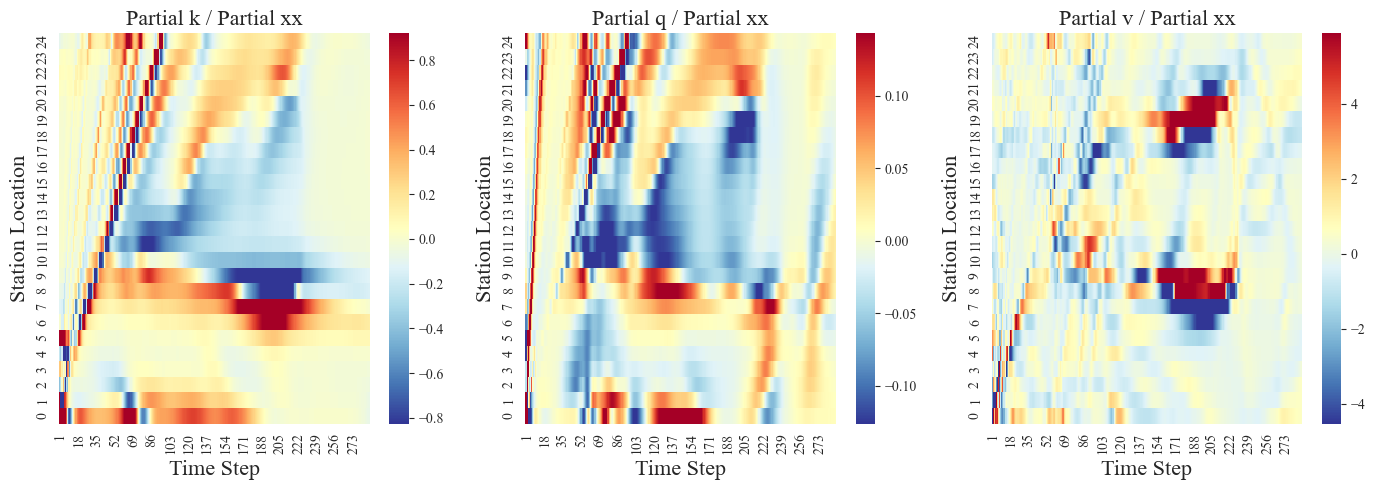

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(k_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial xx",  fontsize = 16)

sns.heatmap(q_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial q / Partial xx",  fontsize = 16)

sns.heatmap(v_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location',  fontsize = 16)
axs[2].set_xlabel('Time Step',  fontsize = 16)
axs[2].set_title("Partial v / Partial xx",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/qv_dev2.png", dpi = 300)

In [29]:
pred['coefficients']

tensor([[ 0.0000e+00],
        [-1.5744e-02],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-2.7221e-02],
        [-0.0000e+00],
        [-3.9225e-02],
        [-1.1856e-02],
        [ 2.2087e-02],
        [ 3.2004e-03],
        [ 0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [ 9.9283e-03],
        [-1.2659e-02],
        [ 2.6252e-03],
        [ 1.0604e-02],
        [-2.6082e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-0.0000e+00],
        [ 0.0000e+00],
        [-7.1657e-04],
        [-0.0000e+00],
        [ 0.0000e+00],
        [ 5.6310e-03],
        [-0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 5.3902e-04],
        [-0.0000e+00],
        [-9.7140e-03],
        [-0.0000e+00],
        [ 1.9624e-02],
        [ 3.1844e-02],
        [-9.5449e-04],
        [-0.0000e+00],
        [ 2.1377e-01],
        [-0.0000e+00],
        [ 8.7940e-02],
        [ 2.8303e-02],
        [-6.8945e-03],
        [-1